# Chapter 9. Convolutional Neural Network

# [실습 1] MNIST with CNN

### [Experiment Setting]

-   **데이터셋** <br>
  Keras에서 Mnist 데이터셋 불러와 input data로는 28x28 픽셀의 손글씨 이미지, y 데이터로는 이미지 분류에 사용되는 0 ~ 9사이의 레이블 값 사용함.


- **모델 구성**
  1. Input layer: convolution layer에 적용하기 위해 이미지 데이터에 채널 추가 (28x28x1)
  2. Convolution layer: 합성곱 필터의 개수는 32개, (3x3)크기의 커널로 convolution layer 구성(3x3x28)
  3. Pooling layer : 풀링층 필터의 크기는 (2x2), MaxPooling 적용
  4. Fully-connected layer: Flatten() 함수로 이미지를 1차원 데이터로 변형
  5. Output layer - 활성화 함수로 softmax 함수 사용하여 출력값 생성

- **모델 컴파일 및 평가 지표** <br>
   손실함수는 sparse_catagorical_crossentropy로 지정하고, optimizer는 Adam, 평가지표로는 accuracy를 사용함. 여기에서 정확도는 이미지 중 올바르게 분류한 비율을 의미함.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Flatten

## 1. 데이터 생성

In [ ]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 정규화
x_train, x_test = x_train/255.0, x_test/255.0

# convolution layer에 적용하기 위해 이미지 데이터에 채널 추가
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

11490434/11490434 [==============================] - 1s 0us/step


## 2. 모델 정의

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape= (28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

## 3. 모델 컴파일 & 훈련

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data =(x_test, y_test),
                    epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1483 - accuracy: 0.9564 - val_loss: 0.0581 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0425 - val_accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0485 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0493 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0471 - val_accuracy

## 4. 모델 평가

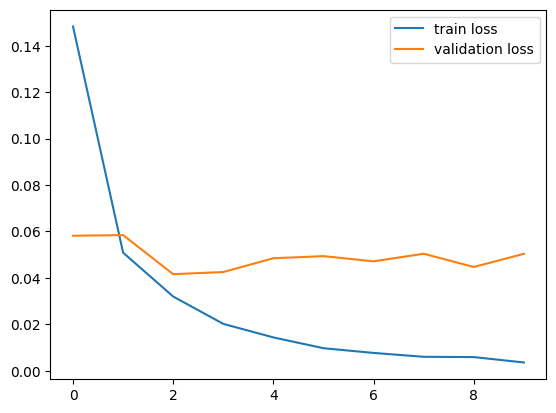

In [ ]:
# Training & Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['train loss', 'validation loss'])
plt.show()

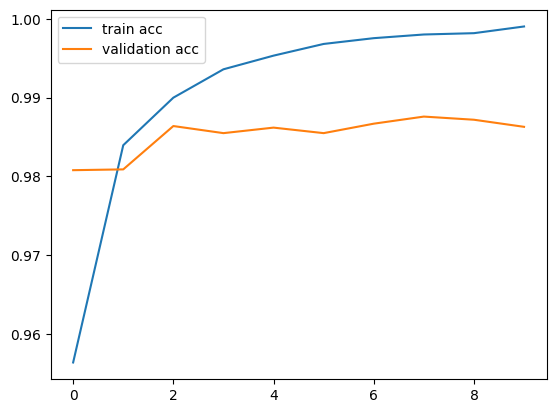

In [ ]:
# Training & Validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train acc', 'validation acc'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9863
테스트 정확도: 0.986299991607666



## [결과 분석]
- 에포크에 따른 training, validation loss 값을 시각화한 결과, <br>
  training loss는 약 0.0에 근접하게 감소했고, validation loss는 약 0.06~ 0.04 사이값로 감소. <br>
  -> training loss에 비해 validation loss 값이 더 높게 측정됨.

- 에포크에 따른 training, validation accuracy 값을 시각화한 결과, <br>
  training accuracy는 99.9%, validation accuracy는 98.6% 의 정확도를 가짐.<br>
  -> training accuracy, validation accuracy 모두 97% 이상으로 매우 높게 측정되었지만, training accuracy에 비해 validation accuracy는 낮게 측정됨.

- test data로 evaluation을 진행한 결과, 10번의 에포크 학습을 통해서 실습 8번의 심층신경망을 사용해서 분류작업을 했을 때는 accuracy가 97.7%이었지만 CNN을 사용했을때는 98.6%로 성능이 향상됨을 확인할 수 있었음.

- 단순한 심층 신경망에서는 Flatten 작업만 진행되어 이미지의 공간적 특성들이 무시되지만, CNN을 사용하면 Flatten 작업이후, Dense 층을 사용하여 밀집층 직전의 입력과 그 후의 출력만 fully-connected layer로 만들기 때문에 이미지의 공간정보를 효과적으로 유지 할 수 있음.

# [실습 2] Fashion MNIST with CNN

### [Experiment Setting]

- 데이터셋 <br>
  Keras에서 Fashion Mnist 데이터셋 불러와 input data로는 28x28 픽셀의 손글씨 이미지, y 데이터로는 이미지 분류에 사용되는 0 ~ 9사이의 레이블 값 사용함.<br>
  (0: T-shirt/top, 1: Trouser, 2:Pullover, 3:Dress, 4:Coat, 5:Sandal, 6:Shirt, 7:Sneaker, 8:Bag, 9:Ankel boot)

- **모델 구성**
  1. Input layer: Flatten() 을 사용해서 28x28 픽셀 값을 1차원 배열로 변환
  2. Convolution layer-1(3x3x64): (3x3) 커널의 합성곱 filter 개수 64개로 conv layer1 구성
  3. Pooling layer-1(2x2): 2x2 크기의 필터로 Max pooling 진행.
  4. Convolution layer-2(3x3x64):(3x3) 커널의 합성곱 filter 개수 64개로 conv layer2 구성
  5. Pooling layer-2(2x2):2x2 크기의 필터로 Max pooling 진행.
  6. Fully-connected layer: Flatten 작업이후 Dense 층 형성, 활성화 함수로 softmax 사용.
  7. Output layer

- **모델 컴파일 및 평가 지표** <br>
   손실함수는 sparse_catagorical_crossentropy로 지정하고, optimizer는 Adam, 평가지표로는 accuracy를 사용함. 여기에서 정확도는 이미지 중 올바르게 분류한 비율을 의미함.

## 1. 데이터 생성

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 데이터 정규화
x_train, x_test = x_train/255.0, x_test/255.0

4422102/4422102 [==============================] - 1s 0us/step


## 2. 모델 정의

In [ ]:
model2 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## 3. 모델 컴파일 & 훈련

In [ ]:
# 모델 컴파일
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history2 = model2.fit(x_train, y_train,
                    validation_data =(x_test, y_test),
                    epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4429 - accuracy: 0.8378 - val_loss: 0.3391 - val_accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2932 - accuracy: 0.8926 - val_loss: 0.2901 - val_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2494 - accuracy: 0.9079 - val_loss: 0.2960 - val_accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2164 - accuracy: 0.9182 - val_loss: 0.2620 - val_accuracy: 0.9071
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1900 - accuracy: 0.9287 - val_loss: 0.2631 - val_accuracy: 0.9055
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1646 - accuracy: 0.9379 - val_loss: 0.2601 - val_accuracy: 0.9089
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1456 - accuracy: 0.9446 - val_loss: 0.2538 - val_accurac

## 4. 모델 평가

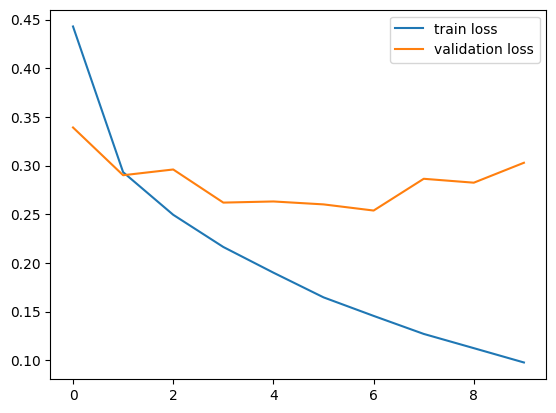

In [ ]:
# Training & Validation loss
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['train loss', 'validation loss'])
plt.show()

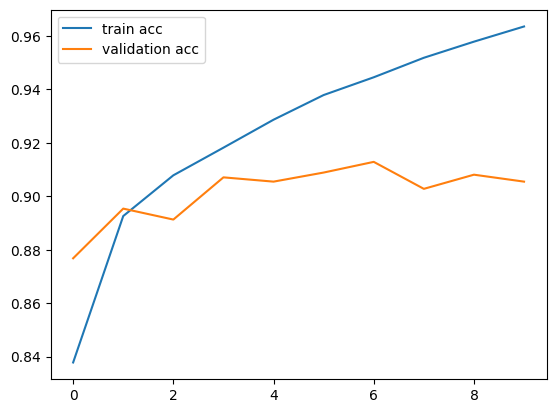

In [ ]:
# Training & Validation accuracy
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train acc', 'validation acc'])
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.9055
테스트 정확도: 0.9054999947547913


## [결과 분석]
- 에포크에 따른 training, validation loss 값을 시각화한 결과, <br>
  training loss는 약 0.10 이하로 감소하였고, validation loss도 0.35이하로 단순 심층신경망을 사용했을 때에 비해 감소함을 확인. <br>

- 에포크에 따른 training, validation accuracy 값을 시각화한 결과, <br>
  training accuracy는 96% 이상이 나왔고, validation accuracy는 약 90.54% 의 정확도를 가짐.<br>

- test data로 evaluation을 진행한 결과, 단순 심층신경망으로 학습을 진행했을 때는 정확도가 88.86% 였지만, CNN으로 학습했을 때는 90.54%로 성능이 향상됨을 알 수 있음.